###### Setup

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [1]:
#hide
import fastbook
fastbook.setup_book()
from fastbook import *

In [5]:
!pip install -Uqq duckduckgo_search

In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

# Train a model to categorise different string instruments

The string instrument family is comprised of the vioin, viola, cello, double bass, and the harp. The first four instruments look extremely similar, with the most differentiable, visual quality being the size. I am curious to know if a model can differentiate between the instruments with only photos, where scale can be difficult to gauge.

### Find a picture of a Violin

In [15]:
urls = search_images('violin', max_images=1)
urls[0]

'https://themusicmood.com/wp-content/uploads/2017/05/Buy-Beginner-Violin-in-Singapore.jpg'

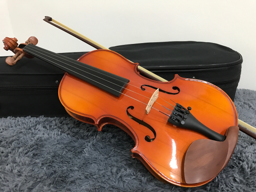

In [16]:
from fastdownload import download_url
dest = 'violin.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Find a picture of a Viola

In [13]:
urls = search_images('viola', max_images=1)
urls[0]

'http://www.get-tuned.com/images/viola.jpg'

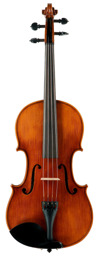

In [14]:
from fastdownload import download_url
dest = 'viola.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Find a picture of a Cello

In [19]:
urls = search_images('cello', max_images=1)
urls[0]

'https://www.corilon.com/shop_userdata/1/items/1141_1_1.jpg'

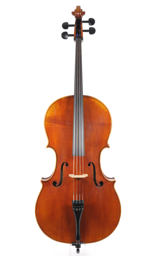

In [20]:
from fastdownload import download_url
dest = 'cello.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Find a picture of a Double Bass

In [23]:
urls = search_images('double bass', max_images=1)
urls[0]

'https://www.talkbass.com/attachments/img_2188-jpg.2850079/'

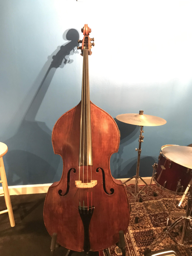

In [24]:
from fastdownload import download_url
dest = 'double_bass.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Find a picture of a Harp

In [25]:
urls = search_images('harp', max_images=1)
urls[0]

'http://theconcordian.org/wp-content/uploads/2015/12/Dec3-3931.jpg'

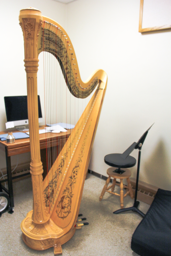

In [26]:
from fastdownload import download_url
dest = 'harp.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

### Get training images and save them into a folder

Note: Some images contain people playing the instruments. This may or may not cause issues. Will need to see.

In [27]:
searches = 'violin','viola','cello','double bass','harp'
path = Path('string_instruments')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

/home/nickylychie/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/nickylychie/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/nickylychie/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/nickylychie/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Remove photos that were not downloaded correctly

In [28]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

20

### Train the model

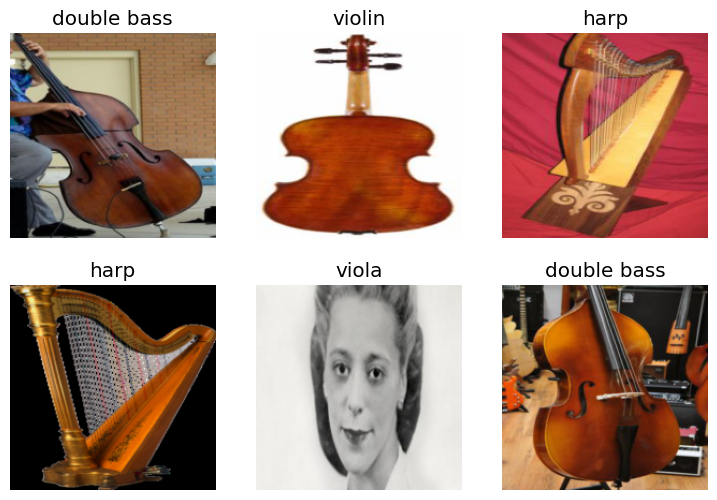

In [40]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [41]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.975309,0.839274,0.205882,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.859136,0.568210,0.182353,00:03
1,0.609875,0.653188,0.158824,00:03
2,0.436581,0.652989,0.170588,00:03


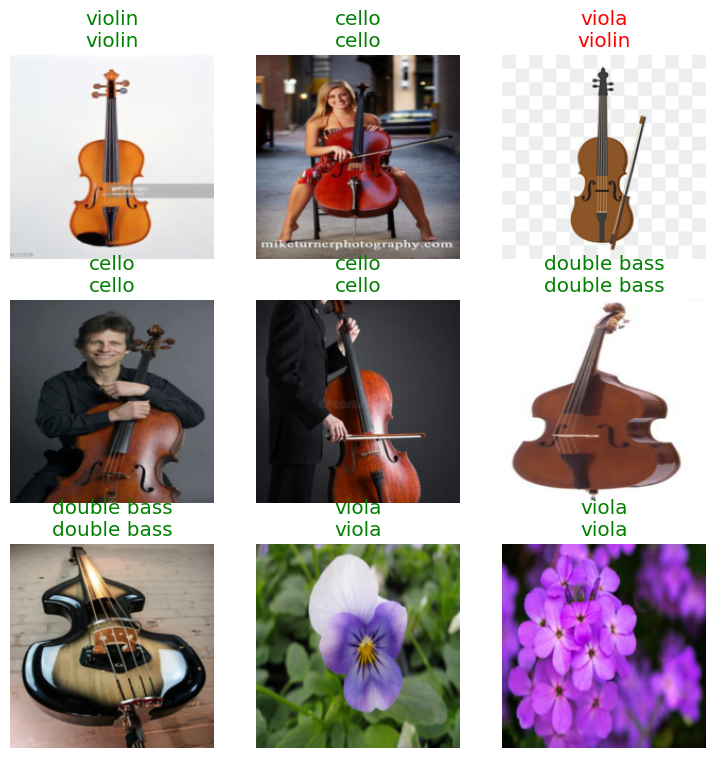

In [42]:
learn.show_results()

### Test model against images downloaded at the start

##### Violin

In [43]:
is_violin,_,probs = learn.predict(PILImage.create('violin.jpg'))
print(f"This is a: {is_violin}.")
print(f"Probability it's a violin: {probs[0]:.4f}")

This is a: violin.
Probability it's a violin: 0.0001


##### Viola

In [44]:
is_viola,_,probs = learn.predict(PILImage.create('viola.jpg'))
print(f"This is a: {is_viola}.")
print(f"Probability it's a viola: {probs[0]:.4f}")

This is a: viola.
Probability it's a viola: 0.0019


##### Cello

In [45]:
is_cello,_,probs = learn.predict(PILImage.create('cello.jpg'))
print(f"This is a: {is_cello}.")
print(f"Probability it's a cello: {probs[0]:.4f}")

This is a: cello.
Probability it's a cello: 0.8208


##### Double Bass

In [46]:
is_double_bass,_,probs = learn.predict(PILImage.create('double_bass.jpg'))
print(f"This is a: {is_double_bass}.")
print(f"Probability it's a double bass: {probs[0]:.4f}")

This is a: double bass.
Probability it's a double bass: 0.0628


##### Harp

In [47]:
is_harp,_,probs = learn.predict(PILImage.create('harp.jpg'))
print(f"This is a: {is_harp}.")
print(f"Probability it's a harp: {probs[0]:.4f}")

This is a: harp.
Probability it's a harp: 0.0000
